<a href="https://colab.research.google.com/github/jh941213/crawling/blob/main/8_API%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8F%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC(%E1%84%8B%E1%85%B2%E1%84%90%E1%85%B2%E1%84%87%E1%85%B3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13. 유튜브 API를 이용한 크롤링

## 1.유튜브 API 사용해서 하나의 영상에 있는 댓글 크롤링하기

### 1.1 유튜브 API를 사용하기 위해 먼저 아래 링크에 들어가서 [My First Project]를 눌러 새 프로젝트를 만들어준다.
https://console.cloud.google.com/apis/dashboard

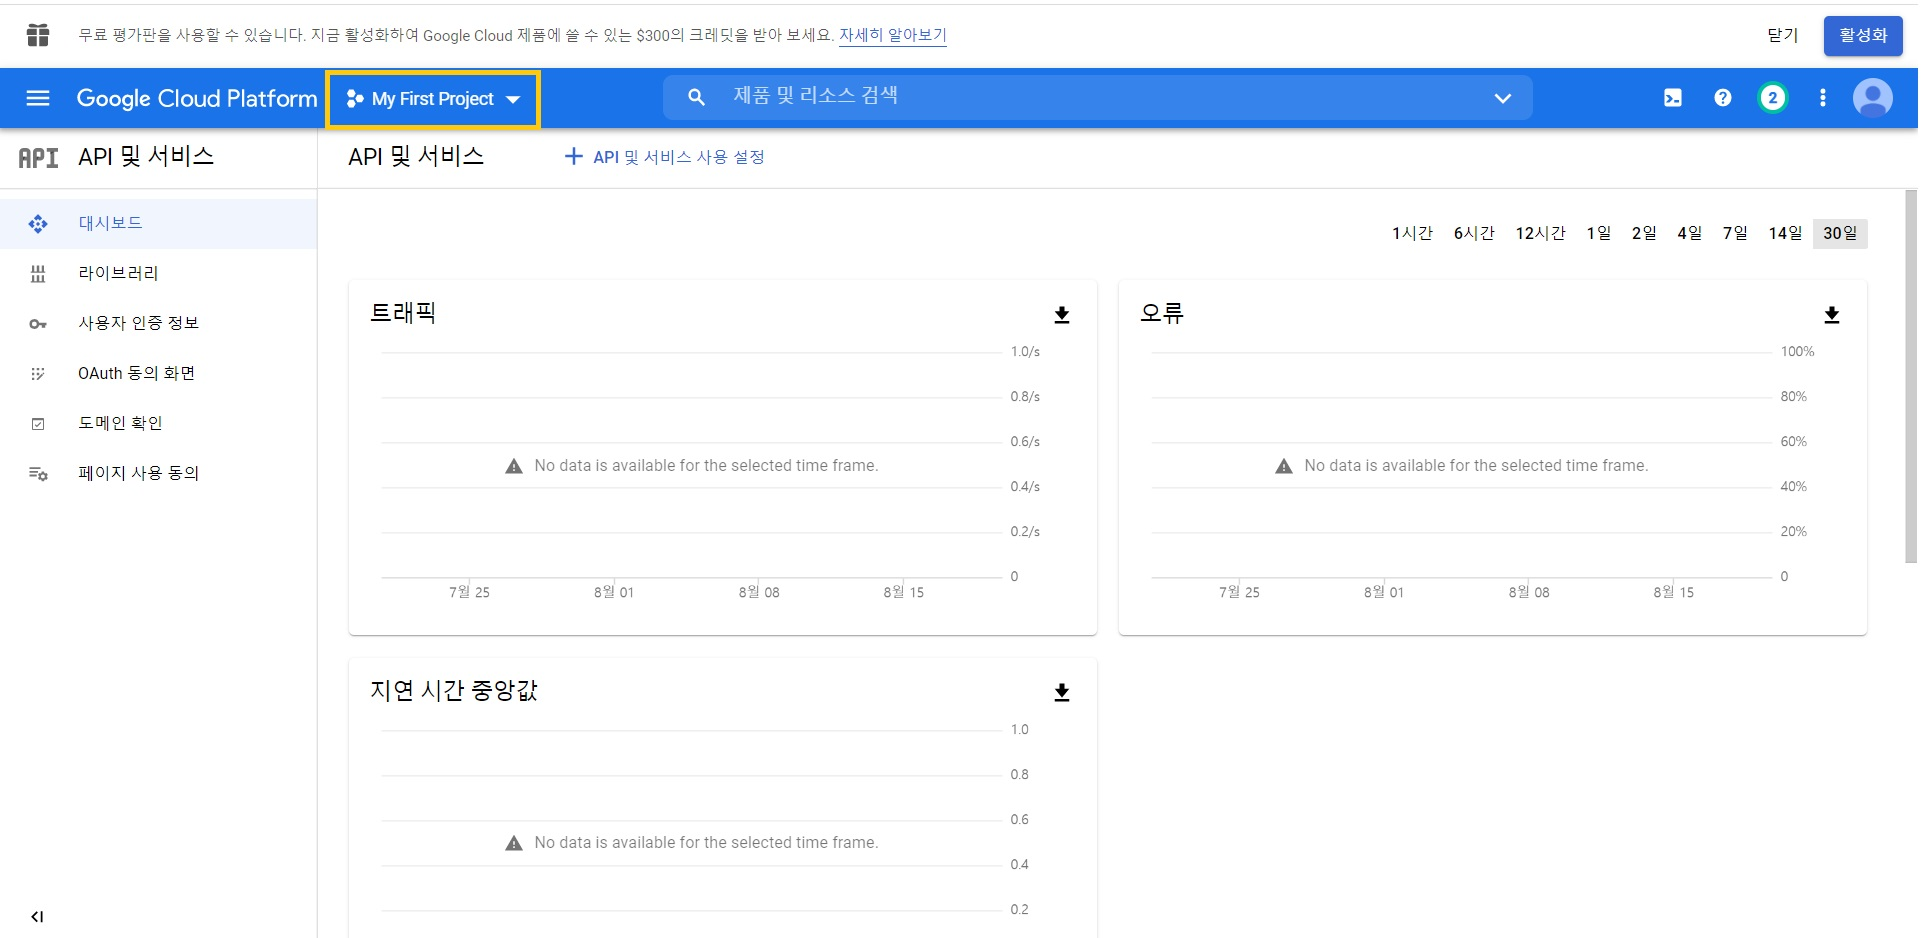

### 1.2 생성된 프로젝트를 선택한 뒤, 왼쪽의 라이브러리를 클릭하여 [라이브러리] 검색 화면으로 이동한다. 검색창에 "youtube"를 입력한 뒤  [YouTube Data API v3]를 클릭한다. 그 다음 이동한 화면에서 "사용" 버튼을 클릭하여 YouTube Data API v3를 활성화 시킨다.

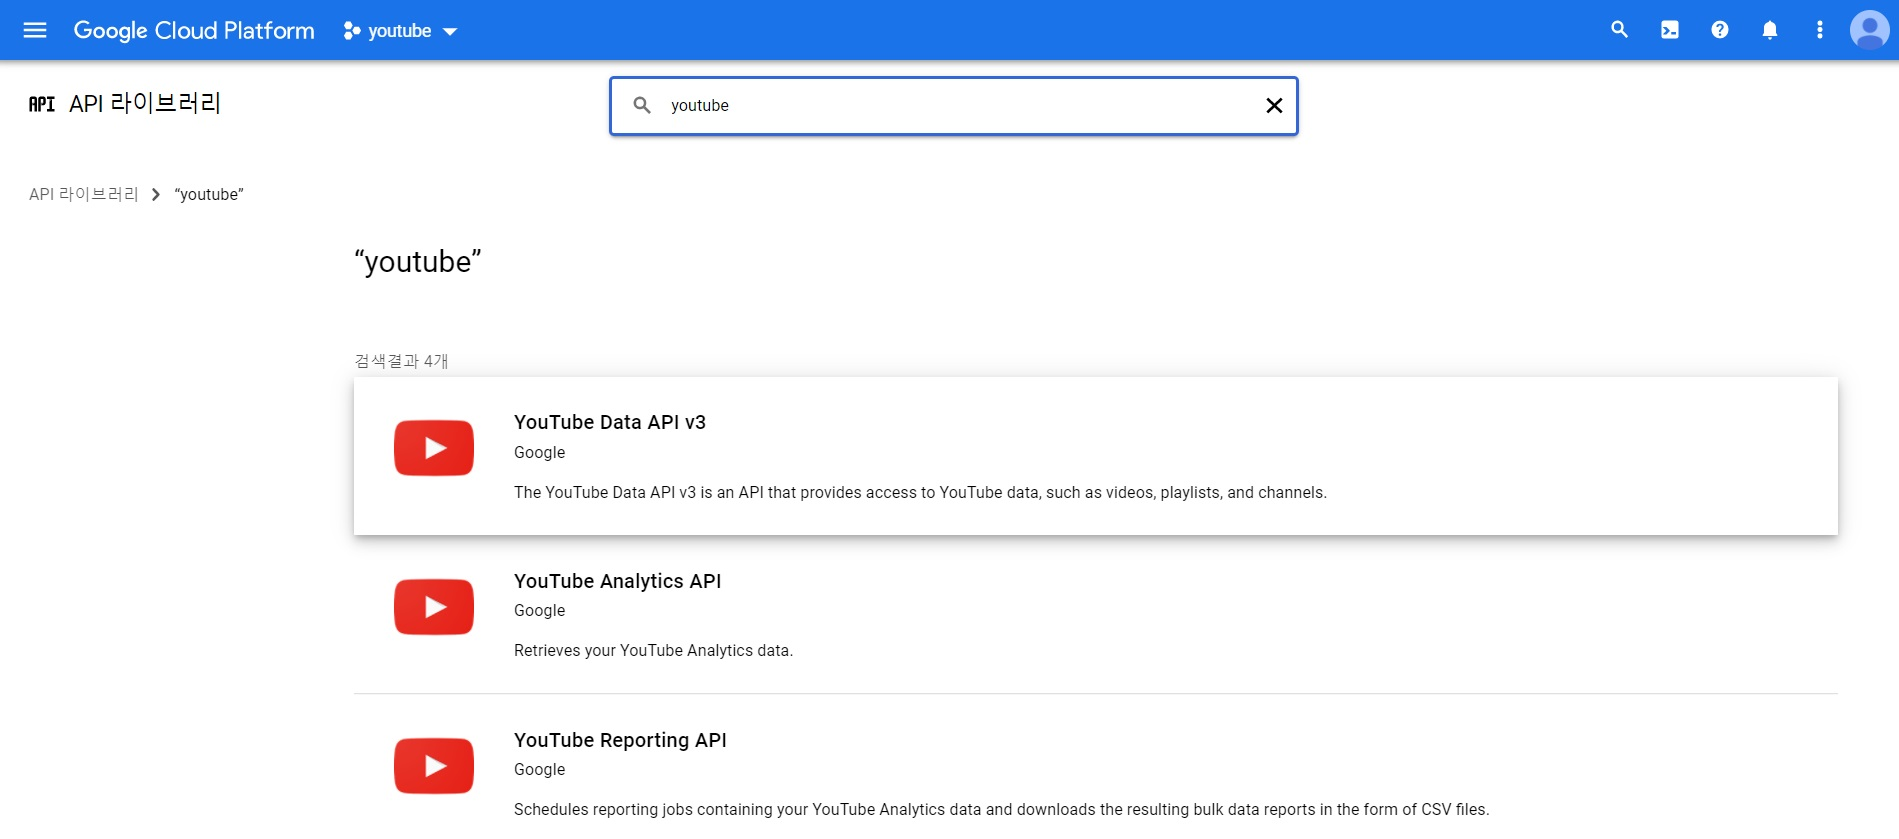

### 1.3 API 활성화 화면에서 왼쪽에 [사용자 인증 정보]를 클릭한 뒤, 상단에 "사용자 인증 정보" - "API 키"를 클릭해 API 키를 발급받는다.

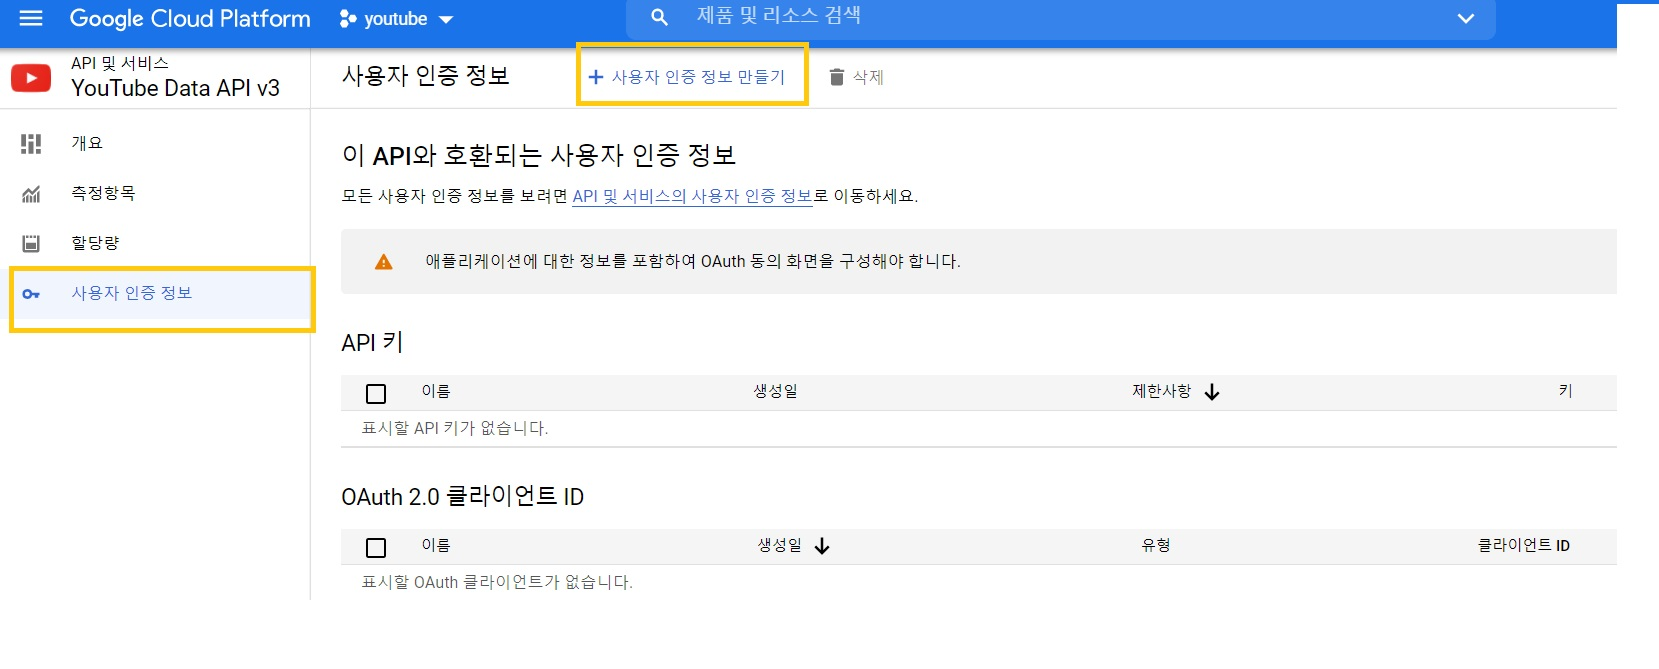

### 1-4. API를 사용하기 위한 구글 API 모듈을 설치해준다.

In [ ]:
!pip install google-api-python-client

In [ ]:
import pandas as pd
from googleapiclient.discovery import build

### 1-5. 발급받은 api 키와 비디오 id를 입력하고, Google API 객체를 생성해 호출한다.
비디오 id는 유튜브 영상 링크에서 "v"에 해당하는 값이다.

(ex.https://www.youtube.com/watch?v=qMwzWk81tVM 의 경우 id는 'qMwzWk81tVM')

In [ ]:
comments = list()
api_key = ''  #key 입력★★★
video_id = 'qMwzWk81tVM'
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, maxResults=100).execute()
#response의 type은 dictionary로 가져와진다!

### 1-6. response에는 댓글에 대해서 다음 4가지 정보를 담고 있다.
- textDisplay : 댓글 내용
- authorDisplayName : 댓글 작성자
- publishedAt : 댓글 작성 시간
- likeCount : 좋아요 수

In [ ]:
#하나의 댓글에 대한 정보
response['items'][0]

{'etag': '0SHZGcC4ATd539YsSUuS5_wA5is',
 'id': 'UgxUW4kqFFanQMi1hmt4AaABAg',
 'kind': 'youtube#commentThread',
 'snippet': {'canReply': True,
  'isPublic': True,
  'topLevelComment': {'etag': 'YG0TNjZgZod0qDMbsUhQjKJC8wM',
   'id': 'UgxUW4kqFFanQMi1hmt4AaABAg',
   'kind': 'youtube#comment',
   'snippet': {'authorChannelId': {'value': 'UCNDj7l2oQ7R6nFhonSoLrSA'},
    'authorChannelUrl': 'http://www.youtube.com/channel/UCNDj7l2oQ7R6nFhonSoLrSA',
    'authorDisplayName': 'GD GO',
    'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLQGRGumYrefGwZSWpioQKK6tN-dN3pbPy6XUBhlyRM=s48-c-k-c0x00ffffff-no-rj',
    'canRate': True,
    'likeCount': 0,
    'publishedAt': '2021-08-19T20:11:29Z',
    'textDisplay': '다른거 다 들어봐도 이게 젤 좋더라 이말이야~',
    'textOriginal': '다른거 다 들어봐도 이게 젤 좋더라 이말이야~',
    'updatedAt': '2021-08-19T20:11:29Z',
    'videoId': 'qMwzWk81tVM',
    'viewerRating': 'none'}},
  'totalReplyCount': 0,
  'videoId': 'qMwzWk81tVM'}}

### 1-7. 이제 모든 댓글의 정보를 가져온다.

In [ ]:
while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])
 
        #댓글에 1개 이상의 댓글이 달려있을 때 같이 수집
        if item['snippet']['totalReplyCount'] > 0:
            for reply_item in item['replies']['comments']:
                reply = reply_item['snippet']
                comments.append([reply['textDisplay'], reply['authorDisplayName'], reply['publishedAt'], reply['likeCount']])

    #가져올 댓글이 남아있으면 nextPageToken을 통해 API를 다시 호출한다.
    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
    else:
        break


1-8. 크롤링한 댓글을 데이터프레임으로 바꿔본다.

In [ ]:
df_comments = pd.DataFrame(comments)
df_comments.columns = ['댓글', '작성자', '작성 시간','좋아요 수']
df_comments

,댓글,작성자,작성 시간,좋아요 수
0,다른거 다 들어봐도 이게 젤 좋더라 이말이야~,GD GO,2021-08-19T20:11:29Z,0
1,공부 습관 자리잡을게요. 감사합니다.,Seon Hm,2021-08-19T06:56:04Z,0
2,just an english comment,dalurin zinia,2021-08-19T04:23:13Z,0
3,The ruddy october neurologically serve because...,Mavis Hicks,2021-08-18T15:26:23Z,0
4,와... 이거다,크림,2021-08-18T13:09:39Z,1
...,...,...,...,...
57,하루에 두번이상 듣기,11아이폰,2021-03-20T01:52:23Z,1
58,와... 노래 진짜 좋네여,HelloWorld,2021-03-16T13:59:53Z,8
59,(나포함) 취준생 그리고 사회 초년생 모두 힘내자!,최제힘,2021-03-16T11:48:49Z,151
60,파이팅!!!!! 팅팅!!,이형주,2021-04-06T13:54:51Z,3


## 2.한 채널의 한 재생목록에 있는 모든 영상 정보 크롤링하기

### 2.1 먼저 원하는 채널의 id를 가져온다.

In [ ]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser

api_key = ''  #key 입력★★★
youtube_api_service_name = "youtube"
youtube_api_version = "v3"

youtube = build(youtube_api_service_name, youtube_api_version, developerKey = api_key)

# channel = input('채널명을 입력하세요 : ')
channel = '이지금[IU Official]'

search_response = youtube.search().list(
        q = channel,
        order = 'relevance',
        part = 'snippet',
        maxResults = 50
        ).execute()

channel_id = search_response['items'][0]['id']['channelId']
print(channel_id)

UC3SyT4_WLHzN7JmHQwKQZww


### 2.2 재생목록과 재생목록 id를 가져온다.

In [ ]:
import pandas as pd

playlists = youtube.playlists().list(
    channelId = channel_id,
    part = "snippet",
    maxResults = 20).execute()

titles = []
ids = []

for i in playlists['items'] :
    titles.append(i['snippet']['title']) #재생목록
    ids.append(i['id']) #재생목록 id

df = pd.DataFrame([titles, ids]).T
df.columns = ['재생목록', '재생목록id']
df

,재생목록,재생목록id
0,엔터 직장인 이지동,PLGhOCcpfhWjfnVnmlQrehDvFrlMnn2W9f
1,아이유의 팔레트,PLGhOCcpfhWjehA7vhdz3eZW9oFVstpkTL
2,LOEN TV,PLGhOCcpfhWjfZ6EkcFwDZulJUYKgI8HZ7
3,COMMERCIAL,PLGhOCcpfhWjc6k4PyfzV_zOvYDk1El20V
4,M/V,PLGhOCcpfhWjenR_5jrOkGhdNILM1_oY9L
5,BEHIND/MAKING,PLGhOCcpfhWjdmmmcnZhFu9fu16gfExTMX
6,IU CLIP,PLGhOCcpfhWjfqBvakt9CaKDuYnjlBl8Kt
7,OFFICIAL,PLGhOCcpfhWje6mTDcL8Yz3yQoKiHZTJhv
8,RECENT VIDEO,PLGhOCcpfhWjf_EGjeaWqOqR9xz1M4WnTD
9,IU TV,PLGhOCcpfhWjeZqunx7WlGOwcJgNIVSTTj


### 2.3 하나의 재생목록에 있는 비디오들의 id를 가져온다.

In [ ]:
palette = df['재생목록id'][1] #아이유의 팔레트
# palette = input('재생목록 이름을 선택해주세요 : ')

playlist_videos = youtube.playlistItems().list(
    playlistId = palette,
    part = "snippet",
    maxResults = 50
)

playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []

for v in playlistitems_list_response['items'] :
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])

palette_df = pd.DataFrame([video_names, video_ids]).T
palette_df.columns = ['제목', '비디오id']
palette_df

,제목,비디오id
0,[아이유의 팔레트] IKMU(아익뮤)와 눈 딱 감고 낙하 (With AKMU) Ep.9,mrBwXXj0p34
1,[아이유의 팔레트] 팔레트에 설치된 와이파이 (With 공유) Ep.8,nvuJXEuYNr8
2,[아이유의 팔레트] 팔레트에서 지겹게 보자고 (With 아이유) Ep.7,L1vjymW7eNg
3,[아이유의 팔레트] 형이 왜 거기서 나와...? (With 변요한) Ep.6,Y-4m_bwhdVA
4,[아이유의 팔레트] '빛나는 팔레트' (With 샤이니) Ep.5,2LnCaecCDd0
5,[아이유의 팔레트] 팔레트에 '있지' (With ITZY) Ep.4,cFppUAKWM_E
6,"[아이유의 팔레트] 아이유, 이승기님이 '니 곡 내 곡' 스킬을 시전하셨습니다 (W...",J4BZNlUNUsA
7,[아이유의 팔레트] 맛있게 그려요 (With 로꼬) Ep.2,MI5ChXiW8oY
8,[아이유의 집콕시그널] 아이유의 팔레트 Ep.1 (With 적재),caCVe6fRPQQ


### 2.4 비디오 id를 이용하여 각 영상의 제목, 조회수, 좋아요 수, 실어요 수, 댓글 개수를 크롤링한다.

In [ ]:
title = []
views = []
likes = []
dislikes = []
comments = []

for i in range(len(palette_df)) :
    request = youtube.videos().list(
        part = "snippet,contentDetails,statistics",
        id = palette_df['비디오id'][i]
    )
    response = request.execute()

    if response['items'] == [] :
        views.append("-")
        likes.append("-")
        dislikes.append("-")
        comments.append("-")

    else :
        title.append(response['items'][0]['snippet']['title'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        dislikes.append(response['items'][0]['statistics']['dislikeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])

palette_detail_df = pd.DataFrame([title, views, likes, dislikes, comments]).T
palette_detail_df.columns = ['제목','조회수','좋아요', '싫어요', '댓글개수']
display(palette_detail_df)

,제목,조회수,좋아요,싫어요,댓글개수
0,[아이유의 팔레트] IKMU(아익뮤)와 눈 딱 감고 낙하 (With AKMU) Ep.9,2985497,116727,691,8273
1,[아이유의 팔레트] 팔레트에 설치된 와이파이 (With 공유) Ep.8,3985017,161146,1215,13693
2,[아이유의 팔레트] 팔레트에서 지겹게 보자고 (With 아이유) Ep.7,1312023,66091,350,5021
3,[아이유의 팔레트] 형이 왜 거기서 나와...? (With 변요한) Ep.6,1368848,54787,396,5688
4,[아이유의 팔레트] '빛나는 팔레트' (With 샤이니) Ep.5,4656837,245023,1003,19860
5,[아이유의 팔레트] 팔레트에 '있지' (With ITZY) Ep.4,5597305,337713,1967,19739
6,"[아이유의 팔레트] 아이유, 이승기님이 '니 곡 내 곡' 스킬을 시전하셨습니다 (W...",4013226,163327,920,11373
7,[아이유의 팔레트] 맛있게 그려요 (With 로꼬) Ep.2,2119672,92971,472,7515
8,[아이유의 집콕시그널] 아이유의 팔레트 Ep.1 (With 적재),1792354,61920,256,4872
